# Matplotlib
Matplotlit is a basic library for displaying data, creating graphs. Probably not the best, but it is very often used.

There are other libraries that offer other charting functionality. Later on, we'll try out 
- plotly
- seaborn

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import pandas as pd
import numpy as np

Let's read and prepare the data for imaging. This is a simple table that shows the length of employment and salary.

In [2]:
data = pd.read_csv ('..\\dataset\\salary_dataset.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,1979
1,1.3,2498
2,1.5,1857
3,2.0,2295
4,2.2,2020


We divide the data into two blocks of variables - input/explaining and target/explained.

In [4]:
inputs=data["YearsExperience"]
targets=data["Salary"]

In [5]:
inputs.head(3)

0    1.1
1    1.3
2    1.5
Name: YearsExperience, dtype: float64

In [6]:
targets.head(3)

0    1979
1    2498
2    1857
Name: Salary, dtype: int64

# Terms in matplotlib library

* Figure
    * The whole "canvas" (window/image).
    * May contain one or more graphs (Axes).
    * Created e.g. by plt.figure() or plt.subplots().

* Axes (ax)
    * The chart itself (the coordinate system where we draw the data).
    * Each Axes has its own axes (x, y, possibly z).
    * Created e.g. from fig.add_subplot() or from plt.subplots().

* Axis (x/y axis)
    * Object that controls the rendering of the axis, its extent, labels, tick marks, etc.
    * Each Axes has two (2D plot) or three (3D plot) axes.

* Legend 
    * Explains what each curve or marker in the chart means.
    * Added with ax.legend().
    * The label for the legend is specified in the draw method (label="...").    

* Tick (marks on axes)
    * Small commas and their labels on the X and Y axis.
    * We distinguish between major ticks - major (larger, with number/caption) and minor ticks - minor (smaller)
    * Can be set manually (ax.set_ticks([...]), ax.set_yticks([...])) or automatically.

* Grid
    * Helps to read the values in the graph.
    * Activates ax.grid(True).
    * Can be enabled separately for main and secondary markers.

* Marker (marker)
    * Symbol to highlight points in the graph.
    * Set by the marker parameter in plot().
    * Examples of markers:
        * "o" - circle
        * "s" - square
        * "^" - up triangle
        * "x" - cross

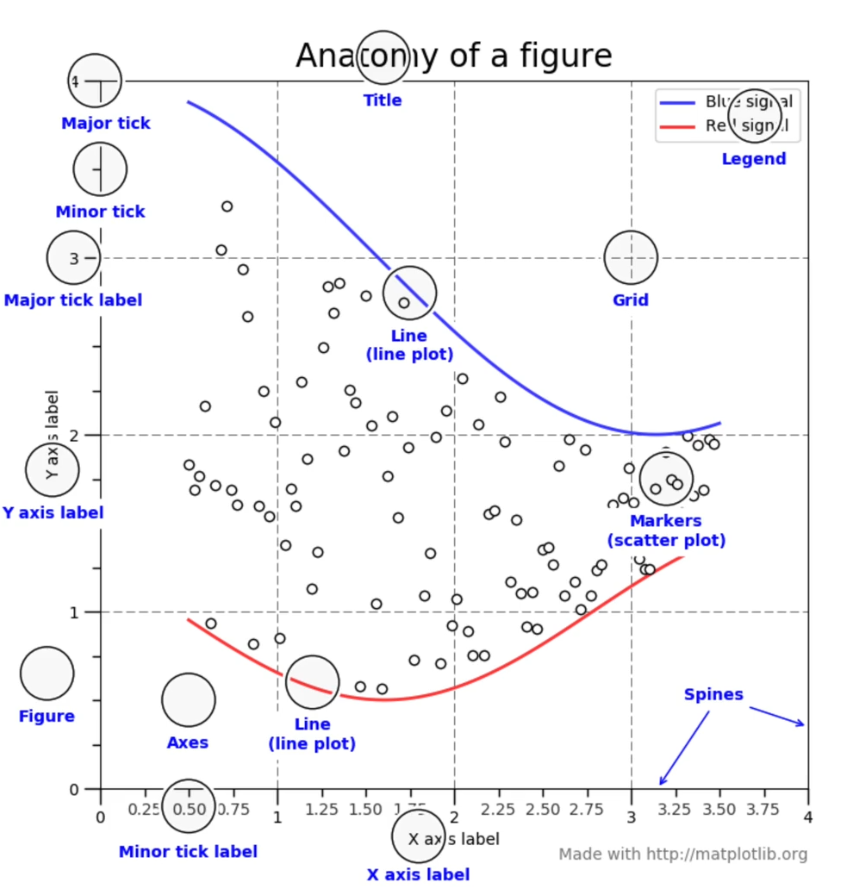 

## Dot chart

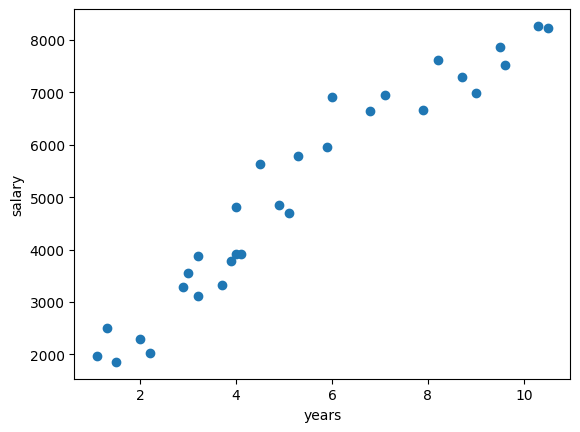

In [7]:
fig1 = plt.figure()                # creating a chart
plt.scatter(inputs, targets)       # scatter - dot plot
plt.xlabel("years")                # axis description
plt.ylabel("salary")               # axis description
plt.show()                         # chart view

Use the numpy library to generate 50 random points.

In [8]:
x=np.random.randint(low=0, high=50, size=50)   
y=np.random.randint(0, 50, 50)

The chart can be displayed directly if there is no need to add decorations.

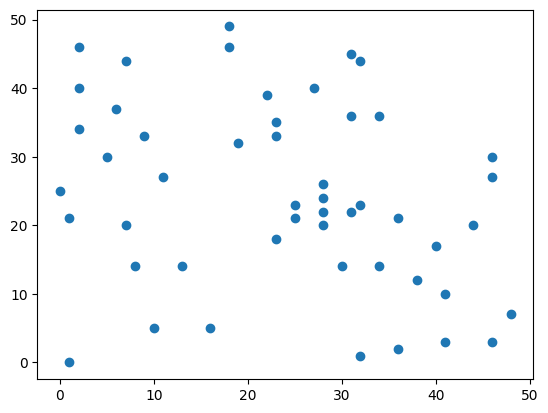

In [9]:
plt.scatter(x, y)

The colour and shape of the dots can be defined.

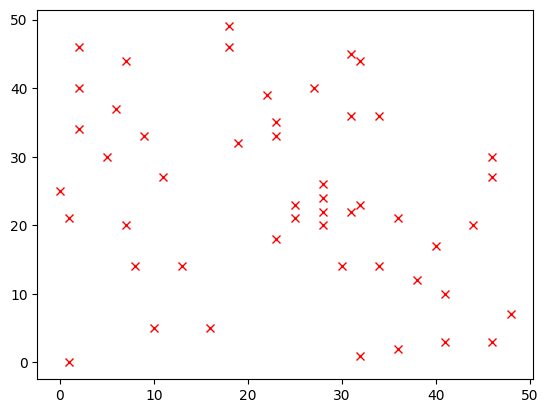

In [10]:
plt.plot(x, y, "rx")

## Line chart
From the random line chart

x coordinates are filled from 0 to 1

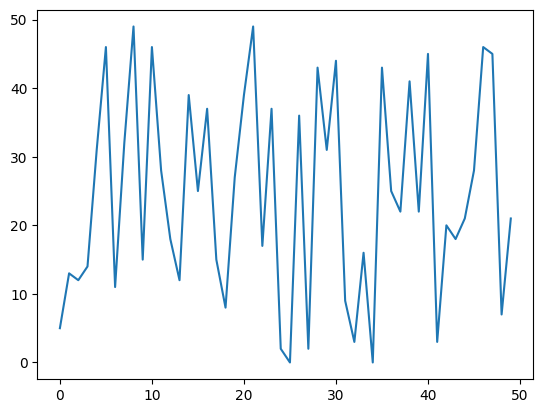

In [11]:
y=np.random.randint(0, 50, 50)
plt.plot(y)

Connecting random points.

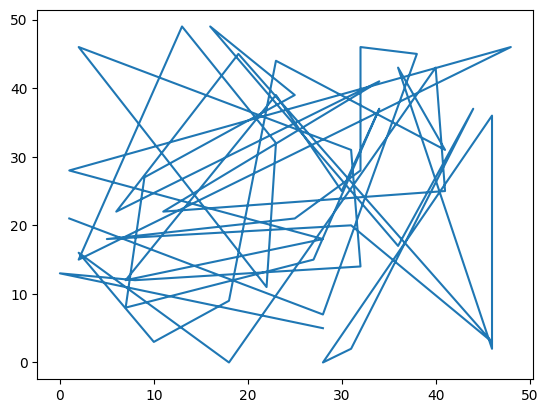

In [12]:
plt.plot(x, y)

## Combination of multiple data in a chart
There can be multiple different data series in a chart. 

Data inputs lie almost in a straight line. Let's add an exact straight line to them. For this we will need a linear function.

In [13]:
def linear(x, a, b):
    """ Linear functions """
    return a*x + b

# setting the parameters of the linear function
a=740
b=1200

The linspace function creates an evenly split sequence of numbers between the specified start and end. We start with 0 and end with 11. In total, we create 10 numbers at regular intervals.

In [14]:
x=np.linspace(start=0, stop=11, num=10)  # creating n regular distances in the interval
print (x)

[ 0.          1.22222222  2.44444444  3.66666667  4.88888889  6.11111111
  7.33333333  8.55555556  9.77777778 11.        ]


Now we will create a chart that will contain the points displayed by the scatter.

It will also contain a plot where the x coordinates of the points will be taken from linspace. y coordinates of the points will be calculated using a linear function.

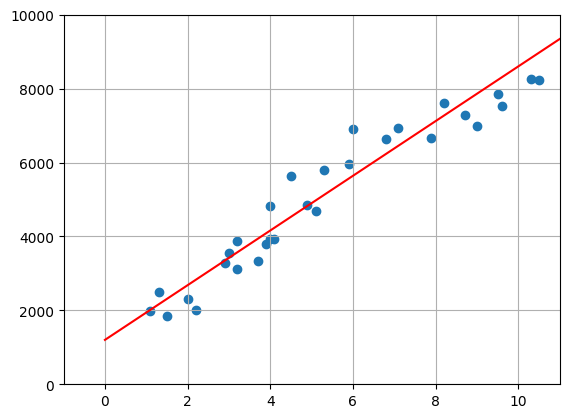

In [15]:
fig2 = plt.figure()
plt.scatter(inputs, targets)               # scatter - plotting points
plt.plot(x, linear(x, a, b), color='red')  # plot - drawing of connected points
plt.ylim(-1, 10000)                        # y-axis constraints
plt.xlim(-1, 11)                           # x-axis constraints
plt.grid()                                 # grid display
plt.show()

## Colum chart
We can test to see if the pseudorandom number generator returns approximately evenly distributed numbers.

We will use the numpy library to generate the random data. We split the frequencies of the hotnots into 3 variables.

In [16]:
x=np.random.randint(0, 100, 10000)
A = np.sum(x < 33)
B = np.sum((x >= 33) & (x < 66))
C = np.sum(x >= 66)
print (A, B, C)

3327 3299 3374


<BarContainer object of 3 artists>

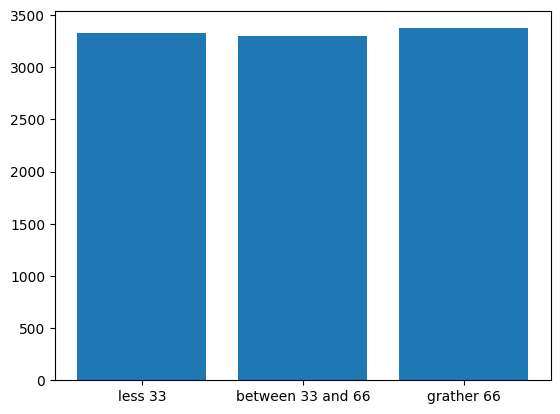

In [17]:
plt.bar (["less 33", "between 33 and 66", "grather 66"], [A, B ,C])

## Histogram
We can achieve a similar result using the historam function. It will display the frequencies in a defined number of intervals.

(array([1057.,  959., 1007.,  975., 1045.,  998.,  999.,  959.,  966.,
        1035.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

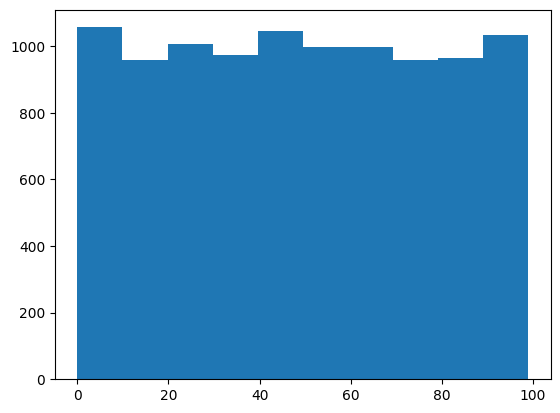

In [18]:
plt.hist(x, 10)

## Image
Sometimes it can be useful to display an image loaded from a file.

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Victor\AppData\Local\Temp\ipykernel_4248\2295241741.py:1: SyntaxWarning: invalid escape sequence '\d'
  img = mpimage.imread ("..\dataset\signal.png")


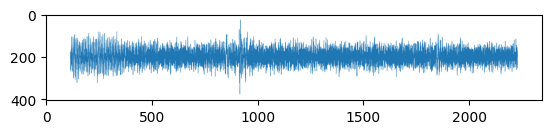

In [19]:
img = mpimage.imread ("..\dataset\signal.png")
plt.imshow(img)

The image does not have to be stored in a file, but can be represented by a matrix. 

The order of the axes depends on the use of
* width x height x channels - pixel matrix is better for matplotlib
* channels x width x height - on the other hand, it is suitable for artificial neural networks
* range of values 0 - 255, 0 - 1

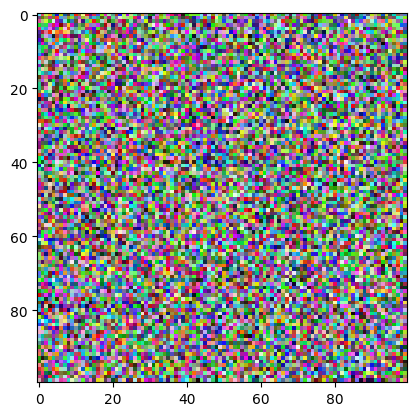

In [20]:
img = np.random.rand(100, 100, 3)
plt.imshow(img)

## Matrix
Sometimes it is necessary to display matrices of numbers as a color scale. For example, to emphasize skewed values.

To do this you can use matshow. When you can choose color schemes (iridis, inferno, magma, ...). 

As a rule, a lighter color indicates a higher value.

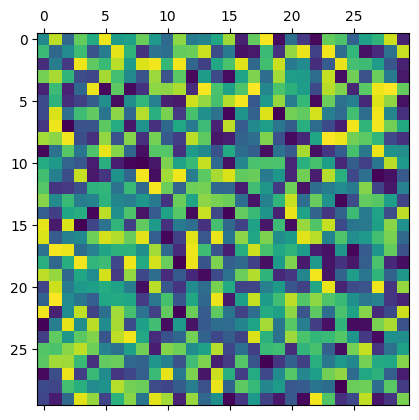

In [21]:
matice = np.random.rand(30, 30)
plt.matshow(matice)

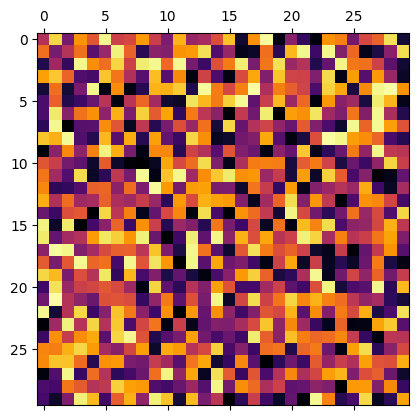

In [22]:
plt.matshow(matice, cmap="inferno")

## Pie
A favorite chart for managers and an unpopular one for statisticians is the pie chart.

([<matplotlib.patches.Wedge at 0x2c260f3d910>,
 [Text(0.15654621983618647, 1.088803600772426, 'A'),
  Text(-0.7858324260104415, -0.9068998832454134, 'B'),
  Text(0.9253791095416961, -0.5947045515411984, 'C')],
 [Text(0.08538884718337443, 0.593892873148596, '45%'),
  Text(-0.45840224850609085, -0.5290249318931577, '36%'),
  Text(0.5047522415681978, -0.32438430084065367, '18%')])

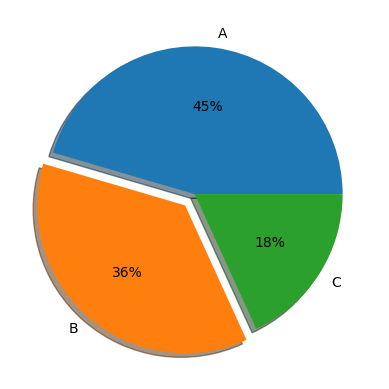

In [23]:
plt.pie ([50, 40, 20], explode=[0, 0.1, 0], labels=["A", "B", "C"], autopct="%i%%", shadow=True)

## Edit chart

The size of the image can be adjusted using figsize.

Note that the image size is in inches.

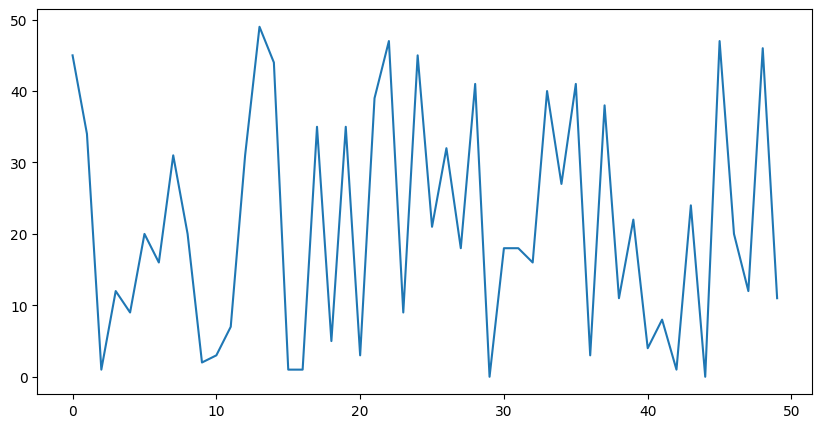

In [24]:
y = np.random.randint(0, 50, 50)
plt.figure (figsize=(10, 5))
plt.plot(y)

We will prepare a function to calculate the moving average so that we can show different styles of line.

By uncommenting the lines, you can experiment.

In [25]:
def moving_average (a, n=3):
    ret = np.cumsum (a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n -1:] /n

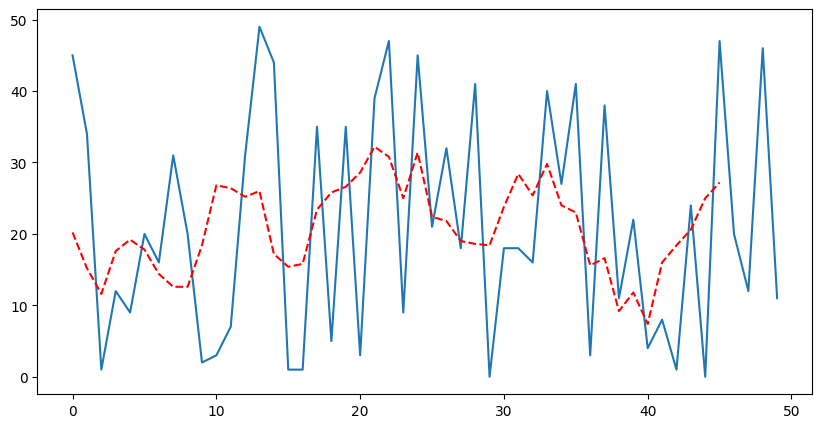

In [26]:
AVG = moving_average(y, 5)
plt.figure (figsize=(10, 5))
plt.plot(y)
plt.plot(AVG, "r--")
#plt.plot(AVG, "r:")
#plt.plot(AVG, "g-.")
#plt.plot(AVG, "r-.+")
#plt.plot(AVG, "r-.*")
#plt.plot(AVG, "r-.o")

If we are making a chart for some work it is advisable to add o:
* label - name of the chart
* plot.label - description of data series
* legend - data series descriptions will be displayed in the legend
* xlabel, ylabel - description of axes
* grid - grid display
* text - you can insert your own text into the chart
* annotate - you can add an explanation to significant points (minimum)

There are many more possibilities to graphically modify the chart.

Text(38, 7.2, 'min')

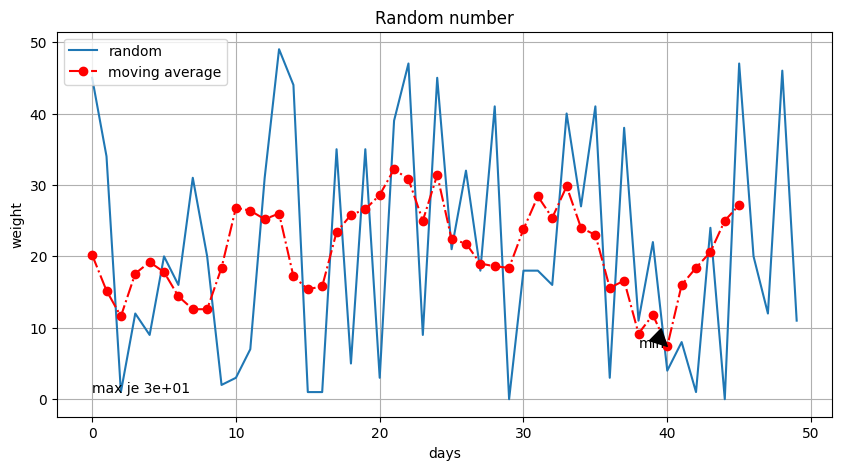

In [27]:
AVG = moving_average(y, 5)
plt.figure (figsize=(10, 5))

plt.title ("Random number")                      # chart name

plt.plot(y, label="random")                      # label - description of the series
plt.plot(AVG, "r-.o", label="moving average")

plt.legend()

plt.xlabel("days")                               # axis description
plt.ylabel("weight")                             # axis description

plt.grid(True)                                   # Grid

maxx=AVG.max()
miny=AVG.min()
minx=AVG.argmin()

plt.text (0, 0.9, f"max je {maxx:.1}")           # insertion of text
plt.annotate("min", xy=(minx, miny), xytext=(minx-2, miny-0.2), arrowprops={"color":"black"})    # insertion of the arrow

## Subplots
Sometimes it happens that you want to create multiple charts within one image.

In this case, you create graphs as subplots.
* In the following example, we will create a 10x10 inch image.
* The image will be divided into 2 graphs, which will lie below each other (2, 1)
* The axes array contains the individual subplots. For easier access, we can store the links to the individual graphs in the variables ax1, ax2
* ax1 is a simple scatter plot
* ax2 contains the data series y and the AVG moving average

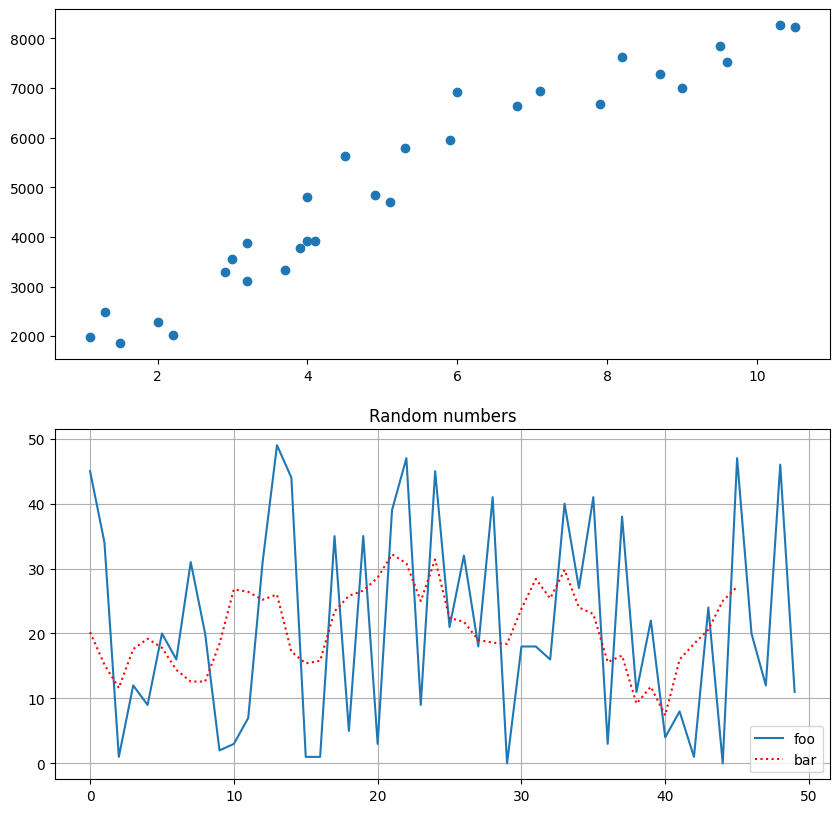

In [28]:
fig = plt.figure (figsize=(10, 10))
axes = fig.subplots (2, 1)
ax1 = axes[0]
ax2 = axes[1]

ax1.scatter(inputs, targets)

ax2.plot(y)
ax2.plot(AVG, "r:")
ax2.legend(["foo", "bar"])
ax2.set_title("Random numbers")
ax2.set_xlabel="days"
ax2.set_ylabel="weight"
ax2.grid(True)

## 3D charts
If you have multidimensional data, it may be a good idea to display it in a 3D chart.

Matplot can do this as follows:

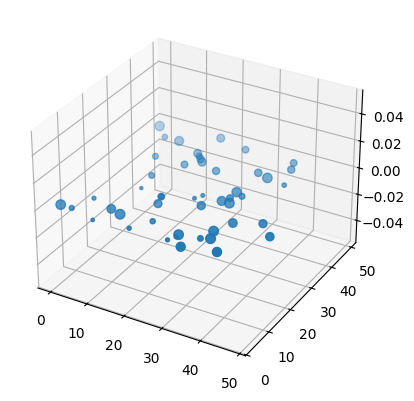

In [35]:
x1 = np.random.randint(0, 50, 50)
x2 = np.random.randint(0, 50, 50)
y = np.random.randint(0, 50, 50)

fig=plt.Figure()
ax = plt.axes(projection = '3d')
plt.scatter(x1, x2, y)
plt.show()

Some libraries, like plotly, allow you to make a 3D chart interactive.

In [36]:
import plotly.graph_objects as go 
fig = go.Figure(layout=go.Layout(width=1000, height=1000))
fig.add_trace(go.Scatter3d(
    x=x1, y=x2, z=y,
    mode='markers',
    marker=dict(size=5, color=y, colorscale='Viridis', opacity=0.8),
    name="Data"
))

fig.show()

## Boxplot
A boxplot is used to display the distribution of data - it shows the median, quartiles, range and outliers.

* line inside the box = median 
* box edges = 1st and 3rd quartiles (Q1 and Q3)
* "whiskers" = typically values in the interval [Q1 - 1.5-IQR, Q3 + 1.5-IQR]
* points outside the whiskers = outliers

In [33]:
import sqlite3
cur = sqlite3.connect ("..\\dataset\\database.db")
points = pd.read_sql_query ("SELECT * FROM points", cur)
points

,NAME,CATEGORY,POINTS,ID,DATE
0,Novák,1,10.0,1,2020-01-10
1,Dvořák,1,15.0,2,2020-10-05
2,Tučný,1,7.0,3,2021-05-31
3,Prokop,2,9.0,4,2021-06-28
4,Kovář,2,1.0,5,2023-07-08
5,Brož,2,25.0,6,2021-06-15
6,Dlouhý,3,6.0,7,2023-08-10
7,Blažek,3,NaN,8,2023-12-31


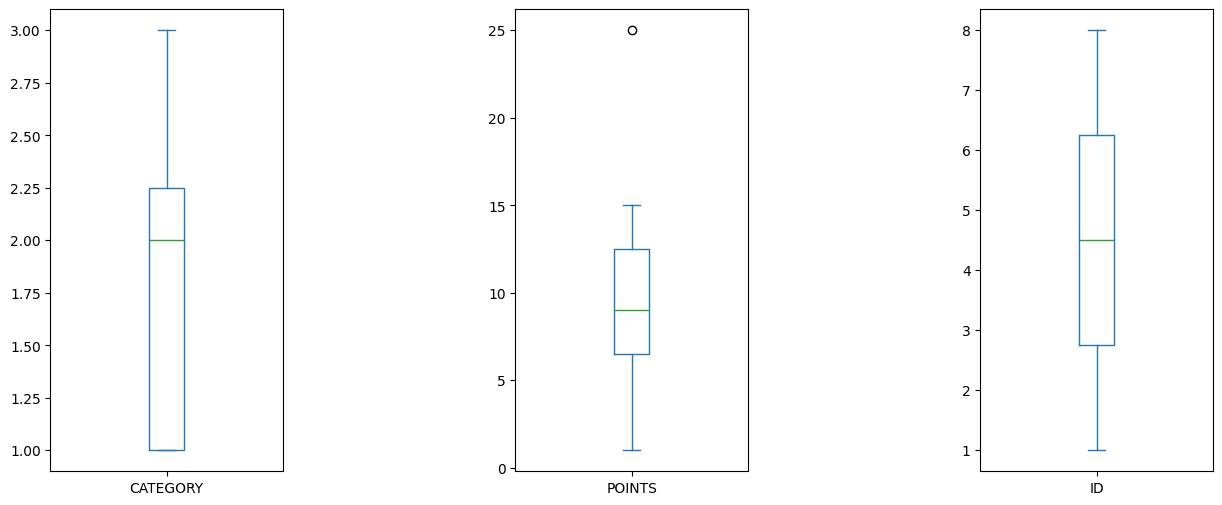

In [34]:
points.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()